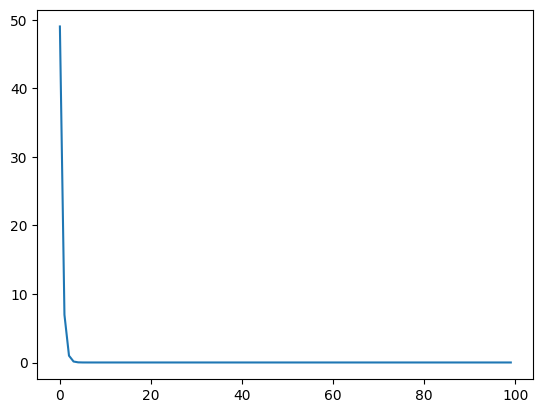

In [1]:
#Q1
import torch
import numpy as np
from torch.autograd import grad
import matplotlib.pyplot as plt

x = torch.tensor([12.4,14.3,14.5,14.9,16.1,16.9,16.5,15.4,17.0,17.9,18.8,20.3,22.4,19.4,15.5,16.7,17.3,18.4,19.2,17.4,19.5,19.7,21.2])
y = torch.tensor([11.2,12.5,12.7,13.1,14.1,14.8,14.4,13.4,14.9,15.6,16.4,17.7,19.6,16.9,14.0,14.6,15.1,16.1,16.8,15.2,17.0,17.2,18.6])
b = torch.rand([1],requires_grad = True)
w = torch.rand([1],requires_grad = True)
learning_rate = torch.tensor(0.001)
loss_list = []

for epochs in range(100):
    loss = 0.0
    for j in range(len(x)):
        a = w*x[j]
        y_p = a + b
        loss += (y[j] - y_p)**2
    loss = loss/len(x)
    loss_list.append(loss.item())

    loss.backward()

    with torch.no_grad():
        w -= learning_rate*w.grad
        b -= learning_rate*b.grad

    w.grad.zero_()
    b.grad.zero_()

plt.plot(loss_list)

In [2]:
#Q2
import torch
import numpy as np
from torch.autograd import grad
import matplotlib.pyplot as plt

inp_x = np.array([2,4])
inp_y = np.array([20,40])

x = torch.tensor(inp_x)
y = torch.tensor(inp_y)
b = torch.tensor(1.,requires_grad = True)
w = torch.tensor(1.,requires_grad = True)
learning_rate = torch.tensor(0.001)
loss_list = []

for epochs in range(2):
    loss = 0.0
    for j in range(len(x)):
        a = w*x[j]
        y_p = a + b
        loss += (y[j] - y_p)**2
    loss = loss/len(x)
    loss_list.append(loss.item())
    loss.backward()

    with torch.no_grad():
        w -= learning_rate*w.grad
        b -= learning_rate*b.grad

    print(w.grad,b.grad)
    w.grad.zero_()
    b.grad.zero_()
    print("w = {},b = {},loss = {}".format(w,b,loss))

def analytical(x,y,w,b):
    for epochs in range(2):
        loss = 0.0
        for j in range(len(x)):
            y_p = w*x[j] + b
            loss += (y[j] - y_p)**2
        loss = loss/len(x)
        wgrad,bgrad = 0,0
        for i in range(len(x)):
            wgrad += (y[j]-y_p)*(x[i])
            bgrad += (y[j]-y_p)
        w -= 0.001*wgrad*2/len(x)
        b -= 0.001*bgrad*2/len(x)
        print("w = {},b = {},loss = {}".format(w,b,loss))

print("Analytical Solution")
analytical(inp_x,inp_y,1,1)

tensor(-174.) tensor(-52.)
w = 1.1740000247955322,b = 1.0520000457763672,loss = 757.0
tensor(-170.2080) tensor(-50.8520)
w = 1.344208002090454,b = 1.1028521060943604,loss = 724.3797607421875
Analytical Solution
w = 0.79,b = 0.9299999999999999,loss = 757.0
w = 0.57454,b = 0.8581799999999999,loss = 797.7140999999999


The parameters are w=tensor([12.9057], requires_grad=True),b=tensor([1.3504], requires_grad=True), and loss =484.05718994140625


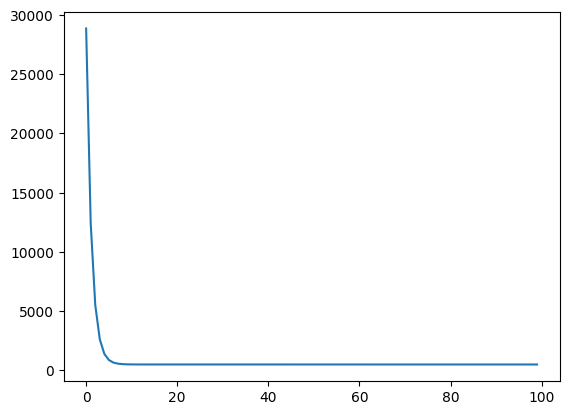

In [5]:
x = torch.tensor([5.0,7.0,12.0,16.0,20.0])
y = torch.tensor([40.0,120.0,180.0,210.0,240.0])
learning_rate = torch.tensor(0.001)

class RegressionModel:
    def __init__(self):
        self.w = torch.rand([1],requires_grad = True)
        self.b = torch.rand([1],requires_grad = True)
    def forward(self,x):
        return self.w*x + self.b
    def update(self):
        self.w -= learning_rate*self.w.grad
        self.b -= learning_rate*self.b.grad
    def reset_grad(self):
        self.w.grad.zero_()
        self.b.grad.zero_()

def criterion(yj,y_p):
    return (yj - y_p)**2

model = RegressionModel()
loss_list = []

for epochs in range(100):
    loss = 0.0
    for j in range(len(x)):
        y_p = model.forward(x[j])
        loss += criterion(y[j],y_p)
    loss = loss/len(x)
    loss_list.append(loss.item())

    loss.backward()

    with torch.no_grad():
        model.update()
    model.reset_grad()

print("The parameters are w={},b={}, and loss ={}".format(model.w,model.b,loss.item()))

plt.plot(loss_list)

In [6]:
#Q4
import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader
import matplotlib.pyplot as plt

In [7]:
class CustomDataset(Dataset):
    def __init__(self, X, Y):
        self.X = X
        self.Y = Y

    def __len__(self):
        return len(self.X)

    def __getitem__(self, i):
        return self.X[i], self.Y[i]


class LinearRegression(nn.Module):
    def __init__(self):
        super(LinearRegression, self).__init__()
        self.w = nn.parameter.Parameter(torch.rand([1]))
        self.b = nn.parameter.Parameter(torch.rand([1]))

    def forward(self, x):
        y_pred = self.w * x + self.b
        return y_pred

In [9]:
X = torch.tensor([5.0, 7.0, 12.0, 16.0, 20.0])
Y = torch.tensor([40.0, 120.0, 180.0, 210.0, 240.0])
dataset = CustomDataset(X, Y)
dataloader = DataLoader(dataset)

In [10]:
model = LinearRegression()
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.001)

In [11]:
loss_list = []
for epoch in range(100):
    running_loss = 0.0
    optimizer.zero_grad()

    for x, y in dataloader:
        y_p = model(x)
        loss = criterion(y_p, y)
        running_loss += loss

    running_loss = running_loss / len(dataloader)
    running_loss.backward()
    optimizer.step()

    print("The parameters are w={:.4f}, b={:.4f} and loss={:.4f}".format(model.w.item(), model.b.item(), running_loss))
    loss_list.append(running_loss.item())

The parameters are w=4.5707, b=0.8167 and loss=29591.8848
The parameters are w=7.4972, b=1.0214 and loss=12734.7939
The parameters are w=9.3956, b=1.1554 and loss=5640.0171
The parameters are w=10.6272, b=1.2436 and loss=2653.9773
The parameters are w=11.4261, b=1.3021 and loss=1397.2130
The parameters are w=11.9443, b=1.3413 and loss=868.2614
The parameters are w=12.2804, b=1.3679 and loss=645.6307
The parameters are w=12.4983, b=1.3864 and loss=551.9230
The parameters are w=12.6396, b=1.3997 and loss=512.4762
The parameters are w=12.7312, b=1.4096 and loss=495.8667
The parameters are w=12.7906, b=1.4172 and loss=488.8686
The parameters are w=12.8290, b=1.4234 and loss=485.9161
The parameters are w=12.8538, b=1.4286 and loss=484.6662
The parameters are w=12.8698, b=1.4333 and loss=484.1331
The parameters are w=12.8801, b=1.4376 and loss=483.9014
The parameters are w=12.8867, b=1.4416 and loss=483.7964
The parameters are w=12.8909, b=1.4454 and loss=483.7449
The parameters are w=12.893

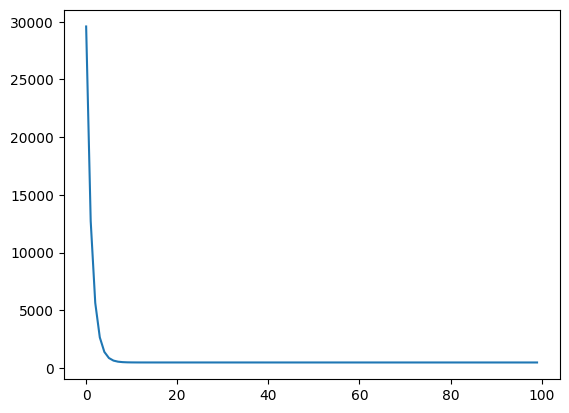

In [12]:
plt.plot(loss_list)
plt.show()

In [13]:
#Q5
import torch
import numpy as np
from torch.autograd import Variable

x = Variable(torch.tensor([12.4,14.3,14.5,14.9,16.1,16.9,16.5,15.4,17.0,17.9,18.8,20.3,22.4,19.4,15.5,16.7,17.3,18.4,19.2,17.4,19.5,19.7,21.2]))
y = Variable(torch.tensor([11.2,12.5,12.7,13.1,14.1,14.8,14.4,13.4,14.9,15.6,16.4,17.7,19.6,16.9,14.0,14.6,15.1,16.1,16.8,15.2,17.0,17.2,18.6]))

class RegressionModel(torch.nn.Module):
    def __init__(self):
        super(RegressionModel, self).__init__()
        self.linear = torch.nn.Linear(23, 23)

    def forward(self,x):
        return self.linear(x)

model = RegressionModel()
criterion = torch.nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr = 0.0032)

for epochs in range(100):
    pred_y = model(x)
    loss = criterion(pred_y, y)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
print("loss ={}".format(loss.item()))

loss =42.884796142578125


In [14]:
#Q6
X = torch.tensor([[3.0, 8],
                  [4, 5],
                  [5, 7],
                  [6, 3],
                  [2, 1]])
Y = torch.tensor([-3.7, 3.5, 2.5, 11.5, 5.7])

In [17]:
class LinearRegression(nn.Module):
    def __init__(self, input_dim, output_dim):
        super().__init__()
        self.linear = torch.nn.Linear(input_dim, output_dim)

    def forward(self, x):
        y_pred = self.linear(x)
        return y_pred

In [18]:
dataset = CustomDataset(X, Y)
dataloader = DataLoader(dataset)
model = LinearRegression(2, 1)
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.001)

In [19]:
loss_list = []
for epoch in range(500):
    running_loss = 0.0
    optimizer.zero_grad()

    for x, y in dataloader:
        y_p = model(x)
        loss = criterion(y_p, y)
        running_loss += loss

    running_loss = running_loss / len(dataloader)
    running_loss.backward()
    optimizer.step()

    loss_list.append(running_loss.item())

    if epoch % 10 == 0:
        print("The parameters are w1={:.4f}, w2={:.4f}, b={:.4f} and loss={:.4f}".format(model.linear.weight[0][0], model.linear.weight[0][1], model.linear.bias.item(), running_loss.item()))

/usr/local/lib/python3.10/dist-packages/torch/nn/modules/loss.py:535: UserWarning: Using a target size (torch.Size([1])) that is different to the input size (torch.Size([1, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


The parameters are w1=0.2530, w2=0.0162, b=0.1325 and loss=30.8905
The parameters are w1=0.4820, w2=0.0233, b=0.1756 and loss=24.8995
The parameters are w1=0.6482, w2=-0.0344, b=0.2050 and loss=21.6079
The parameters are w1=0.7854, w2=-0.1136, b=0.2284 and loss=19.0087
The parameters are w1=0.9067, w2=-0.1975, b=0.2489 and loss=16.7669
The parameters are w1=1.0177, w2=-0.2799, b=0.2677 and loss=14.8017
The parameters are w1=1.1206, w2=-0.3587, b=0.2853 and loss=13.0743
The parameters are w1=1.2166, w2=-0.4331, b=0.3020 and loss=11.5550
The parameters are w1=1.3065, w2=-0.5031, b=0.3178 and loss=10.2187
The parameters are w1=1.3907, w2=-0.5689, b=0.3329 and loss=9.0434
The parameters are w1=1.4695, w2=-0.6306, b=0.3473 and loss=8.0095
The parameters are w1=1.5434, w2=-0.6885, b=0.3611 and loss=7.1000
The parameters are w1=1.6127, w2=-0.7428, b=0.3742 and loss=6.3000
The parameters are w1=1.6776, w2=-0.7937, b=0.3868 and loss=5.5963
The parameters are w1=1.7385, w2=-0.8415, b=0.3988 and 

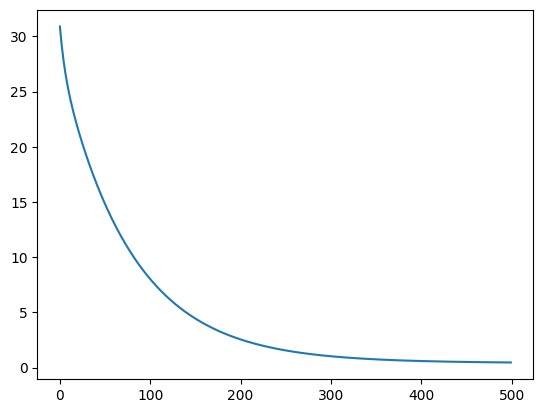

In [20]:
plt.plot(loss_list)
plt.show()

In [21]:
#Q7
class LogisticRegression(nn.Module):
    def __init__(self, input_dim, output_dim):
        super().__init__()
        self.linear = nn.Linear(input_dim, output_dim)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        x = self.linear(x)
        y_pred = self.sigmoid(x)
        return y_pred

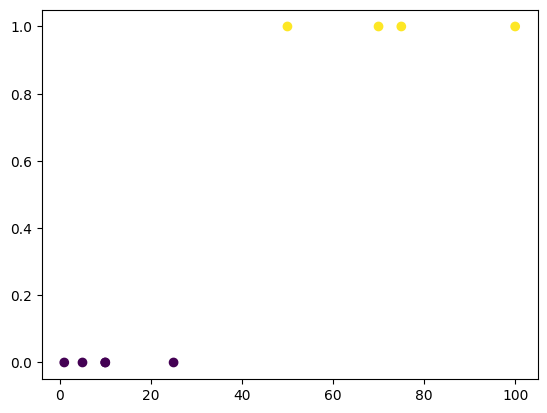

In [22]:
X = torch.tensor([1, 5, 10, 10, 25, 50, 70, 75, 100], dtype=torch.float32)
Y = torch.tensor([0, 0, 0, 0, 0, 1, 1, 1, 1], dtype=torch.float32)

plt.scatter(X, Y, c=Y)
plt.show()

In [23]:
dataset = CustomDataset(X, Y)
dataloader = DataLoader(dataset)

model = LogisticRegression(1, 1)
criterion = nn.BCELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)

loss_list = []
for epoch in range(1000):
    running_loss = 0.0
    optimizer.zero_grad()

    for x, y in dataloader:
        y_p = model(x)
        loss = criterion(y_p, y)
        running_loss += loss

    running_loss = running_loss / len(dataloader)
    running_loss.backward()
    optimizer.step()

    loss_list.append(running_loss.item())

    if epoch % 100 == 0:
        print("The parameters are w={:.4f}, b={:.4f} and loss={:.4f}".format(model.linear.weight.item(), model.linear.bias.item(), running_loss.item()))

The parameters are w=0.0183, b=0.1594 and loss=0.6376
The parameters are w=0.0220, b=-0.1131 and loss=0.5278
The parameters are w=0.0284, b=-0.3578 and loss=0.4550
The parameters are w=0.0365, b=-0.5774 and loss=0.3975
The parameters are w=0.0435, b=-0.7757 and loss=0.3567
The parameters are w=0.0472, b=-0.9566 and loss=0.3239
The parameters are w=0.0507, b=-1.1223 and loss=0.2964
The parameters are w=0.0539, b=-1.2747 and loss=0.2731
The parameters are w=0.0570, b=-1.4156 and loss=0.2532
The parameters are w=0.0599, b=-1.5464 and loss=0.2361


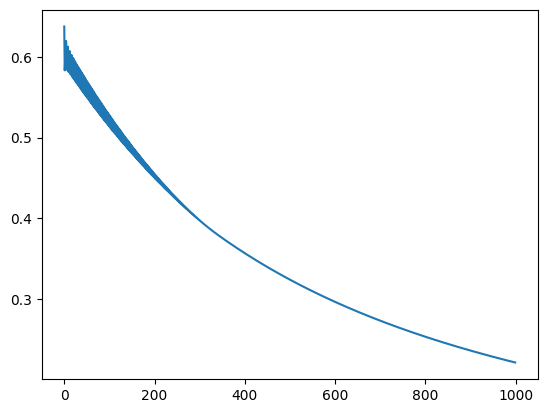

In [24]:
plt.plot(loss_list)
plt.show()